In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

In [2]:
model = tf.keras.models.load_model('../method-3/fracatlas/frac_atlas_model')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 conv2d_4 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [3]:
def classify_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(256, 256), color_mode='grayscale')
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Use the model to classify the image
    pred = model.predict(x)
    pred_binary = (pred > 0.5).astype(int)
    if pred_binary[0][0] == 0:
        print('Image is classified as a fracture')
    else:
        print('Image is classified as a non-fracture')
    plt.imshow(x[0]/255., cmap='gray')

1/1 [==============================] - 5s 5s/step
Image is classified as a fracture


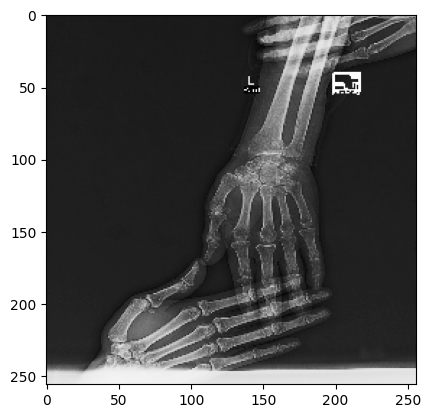

In [4]:
classify_image('../data/FracAtlas/images/Fractured/IMG0000019.jpg')

1/1 [==============================] - 0s 21ms/step
Image is classified as a non-fracture


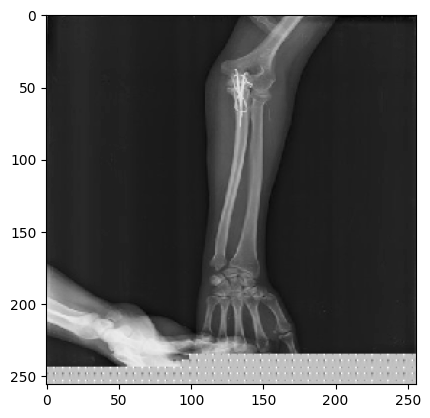

In [5]:
classify_image('../data/FracAtlas/images/Fractured/IMG0004232.jpg')

1/1 [==============================] - 0s 18ms/step
Image is classified as a non-fracture


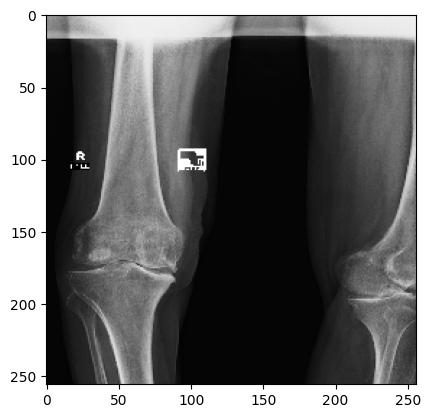

In [6]:
classify_image('../data/FracAtlas/images/Non_fractured/IMG0000021.jpg')

1/1 [==============================] - 0s 17ms/step


Image is classified as a non-fracture


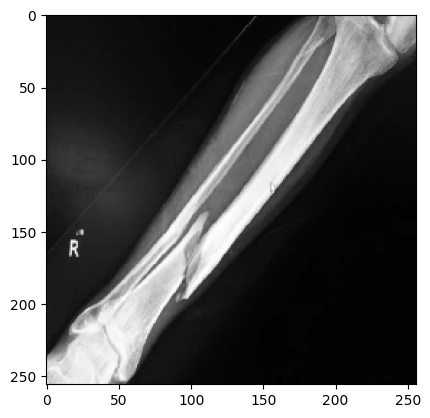

In [7]:
classify_image('../data/321642_2200-732x549.jpg')

1/1 [==============================] - 0s 20ms/step
Image is classified as a non-fracture


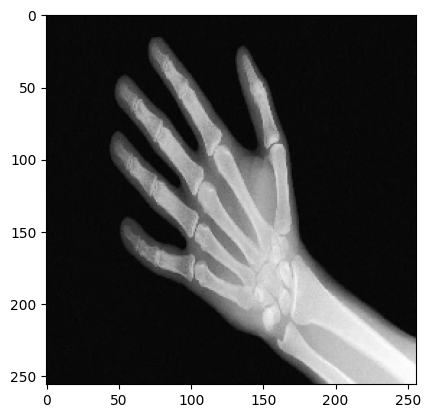

In [8]:
classify_image('../data/bone_density_GettyImages1227502677_Header-1024x575.jpg')

1/1 [==============================] - 0s 14ms/step
Image is classified as a fracture


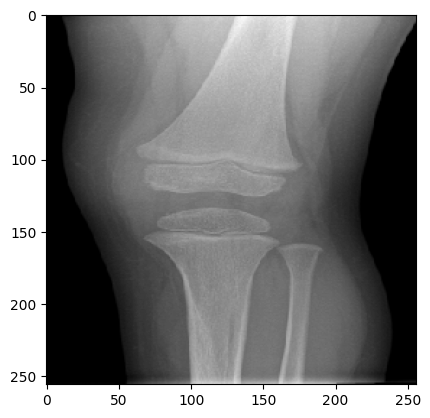

In [9]:
classify_image('../data/unnamed.png')